In [1]:
import os, sys, shutil, copy
import random, math
import numpy as np
import json
import cv2
from matplotlib import pyplot as plt
sys.path.append("../")
%load_ext autoreload
%autoreload 2

In [8]:
from os.path import join as pjoin

In [2]:
from utils.utils import makeMini, myPlot, answerToPoints, meanTruth, newVals, iterMean
from scorer_scripts_v2.scorer_scripts_v2.score_detections import score
from starter_scripts_v2.starter_scripts_v2.helper import plot_bbox

##### Load + Build truth data sets

In [13]:
p_truth_old = '../training_GT_labels_v2.json'
with open(p_truth_old, 'r') as f:
    truth_old = json.load(f)

In [14]:
p_truth_new = '../labelling/newdata/'
json_fns = filter(lambda fn: '.json' in fn, os.listdir(p_truth_new))

In [15]:
truth_new = {}
for fn in json_fns:
    with open(os.path.join(p_truth_new, fn), 'r') as f:
        tmp_truth = json.load(f)
    for _k in tmp_truth.keys():
        truth_new[_k] = tmp_truth[_k]
print len(truth_new.keys())

5833


In [38]:
# clean data
truth_clean = {}
for k in truth_new.keys():
    v0 = truth_old.get(k,None)
    if v0 is None:
        continue
    truth_clean[k] = truth_new[k]
print len(truth_clean.keys())

5831


In [39]:
with open('../truth_new.json', 'w') as f:
    json.dump(truth_clean, f)

##### Diffs

In [22]:
diff_list = []
for k in truth_new.keys():
    v0 = truth_old.get(k, [None])[0]
    v1 = truth_new.get(k, [None])[0]
    if v0 is None:
        diff_list.append([None]*8)
        continue
    if len(v0) == 0 or len(v1) == 0:
        diff_list.append([None]*8)
        continue
    diff = [a - b for a,b in zip(v0,v1)]
    changes = 8 - diff.count(0)
    b_change = 1 if changes > 0 else 0
    max_change = max([abs(x) for x in diff])
    sum_change = sum([abs(x) for x in diff])
    #                 0-fn,   1,  2,  3,               4,       5,        6           7
    diff_list.append([str(k), v0, v1, copy.copy(diff), changes, b_change, max_change, sum_change])
    
len(diff_list)

5833

In [36]:
max_change = copy.copy(diff_list)
max_change.sort(key=lambda k: k[6], reverse=True)
[(e[0], e[6]) for e in max_change[:4]]

[('IMG_9561.JPG', 550),
 ('IMG_3325.JPG', 547),
 ('IMG_2995.JPG', 513),
 ('IMG_2951.JPG', 504)]

##### plot diffs

IMG_9561.JPG
[[902, 141, 395, 117, 362, 648, 922, 651]] [[406, 151, 893, 163, 911, 654, 372, 647]]
Old ------------------


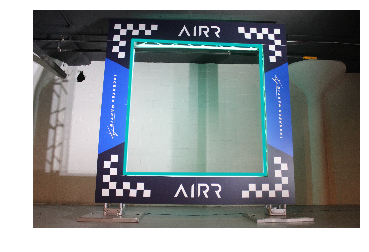

New ------------------


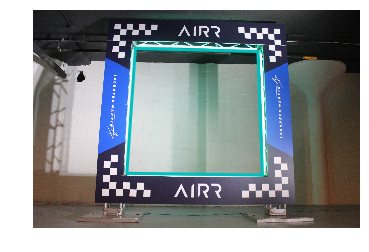

In [37]:
p_training = '../Data_Training/Data_Training/'
i = random.randint(0,len(diff_list) )
fn = truth_new.keys()[i] 

fn = 'IMG_9561.JPG'

bbox_old = truth_old[fn]
bbox_new = truth_new[fn]

print fn
print bbox_old, bbox_new

img = cv2.imread(pjoin(p_training, fn))
img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

print 'Old ------------------'
plot_bbox(img = img, bbox = bbox_old)
plt.show()
print 'New ------------------'
plot_bbox(img = img, bbox = bbox_new)
plt.show()